# The curse of math - module 4: exersices from lessons

### Полиномы и интерполяция. Практика
Ниже приведены визуализации некоторых наборов точек. Определите, полиномом какой
степени можно гарантированно решить задачу интерполяции для данного набора точек
(т.е. полином какой степени гарантированно окажется достаточно гибким для того, чтобы
пройти через все данные точки).


Решение: <br>
    1-a1 - линейная функция <br>
    2-a2 - параболла <br>
    3-а4 - полином 4 степени <br>
    4-а11 - полином 12 степени <br>

### Homework is lesson 4-5

In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_polyfunc_title(koefs):
    s_koefs = ''.join([f'+{koefs[i]}x^{len(koefs)-i-1}' if koefs[i]>0 
                       else f'{koefs[i]}x^{len(koefs)-i-1}' if koefs[i]<0 
                       else ''
                       for i in range(len(koefs))])
    expr = s_koefs.replace('x^0', '') \
                  .replace('+', ' + ') \
                  .replace('-', ' - ') \
                  .replace('x^1', 'x') \
                  .replace(' 1x', ' x')

    if expr[:3]==' + ':
        expr = expr[3:]
    if expr:
        return '$f(x) = ' + expr + '$'
    
def check(f, x, y):
    check = False not in [f(x[i])==y[i] for i in range(len(x))]
    if not check:
        print('Пока не получилось')
    else:
        print('Ура! Получилось!')

In [3]:
def parabola(a, b, c):
    plt.figure(3)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    x, y = [x for x, y in points], [y for x, y in points]
    plt.scatter(x, y, c='r')


    
    if a != 0:
        f = lambda x: a * x**2 + b * x + c
        check(f, x, y)
        
        x = np.linspace(-15, 15, num=1000)
        plt.plot(x, a * x**2 + b * x + c)
    
    plt.ylim(-35, 35)
    plt.xlim(-10, 10)
        
    plt.title(get_polyfunc_title([a,b,c]))
    plt.show()

In [4]:
# points = [[-2.5, 15.0], 
#           [-2, 10], 
#           [-1.5, 7.0], 
#           [-1, 6], 
#           [-0.5, 7.0], 
#           [0, 10], 
#           [0.5, 15.0], 
#           [1, 22], 
#           [1.5, 31.0]]

# interactive_plot = interactive(parabola, a=(-5, 5, 1), b=(-100, 100, 1), c=(-20, 20, 1))
# output = interactive_plot.children[-1]
# output.layout.height = '300px'
# interactive_plot

In [5]:
# points = [[-5.0, -68.0], 
#           [-3.75, -42.375], 
#           [-2.5, -23.0], 
#           [-1.25, -9.875], 
#           [0.0, -3.0], 
#           [1.25, -2.375], 
#           [2.5, -8.0], 
#           [3.75, -19.875], 
#           [5.0, -38.0]]

# interactive_plot = interactive(parabola, a=(-5, 5, 1), b=(-100, 100, 1), c=(-20, 20, 1))
# output = interactive_plot.children[-1]
# output.layout.height = '300px'
# interactive_plot

### Homework 4.6 - 4.7

In [6]:
def cubic_parabola(a, b, c, d):
    plt.figure(3)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    x, y = [x for x, y in points], [y for x, y in points]
    plt.scatter(x, y, c='r')
    
    if a!=0:
        f = lambda x: a * x**3 + b * x**2 + c * x + d
        check(f, x, y)
        
        x = np.linspace(-15, 15, num=1000)
        plt.plot(x, a * x**3 + b * x**2 + c * x + d)
        
    plt.ylim(-35, 35)
    plt.xlim(-5, 5)
    
    plt.title(get_polyfunc_title([a,b,c,d]))
    
    plt.show()

In [7]:
# points = [[-0.5, -15.0],
#           [-1, -31],
#           [0, -7],
#           [0.5, -4.0],
#           [1, -3],
#           [2, 5],
#           [2.5, 18.0],
#           [3, 41]]

# interactive_plot = interactive(cubic_parabola, a=(-15, 15, 1), b=(-10, 10, 1), c=(-10, 10, 1), d=(-10, 10, 1))
# output = interactive_plot.children[-1]
# output.layout.height = '300px'
# interactive_plot

In [8]:
points = [[-5.0, -68.0],
          [-3.75, -8.234375],
          [-2.5, 16.375],
          [-1.25, 17.546875],
          [0.0, 7.0],
          [1.25, -3.546875],
          [2.5, -2.375],
          [3.75, 22.234375],
          [5.0, 82.0]]

interactive_plot = interactive(cubic_parabola, a=(-15, 15, 1), b=(-10, 10, 1), c=(-10, 10, 1), d=(-10, 10, 1))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(IntSlider(value=0, description='a', max=15, min=-15), IntSlider(value=0, description='b'…

### Lesson 4.8

In [9]:
from sympy import *
from sympy.plotting import plot
init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [10]:
a2, a1, a0 = symbols('a2,a1,a0')

In [11]:
equation1_left_part = a2 - a1 + a0 + 1
equation2_left_part = 4*a2 + 2*a1 + a0 - 8
equation3_left_part = 4*a2 -2*a1 + a0 + 8

In [12]:
nonlinsolve([equation1_left_part,
             equation2_left_part,
             equation3_left_part],[a2, a1, a0])

In [13]:
x = Symbol('x')

In [14]:
f_eq = -1*x**2 + 4*x + 4
f_eq

In [15]:
f_eq.subs(x, -2), f_eq.subs(x, 2), f_eq.subs(x, -1)

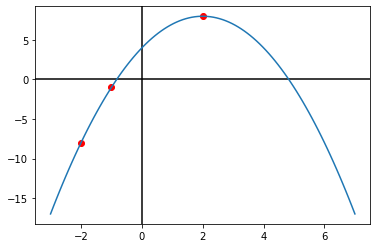

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x_range = np.linspace(-3, 7, num=100)
f = lambda x: -x**2 + 4*x + 4
plt.scatter([-1, 2, -2], [-1, 8, -8], c='r')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x_range, f(x_range))

### the homework for the lesson 4.8

## Нахождение коэффициентов полиномов аналитически. Практика

Для закрепления пройденного материала найдите коэффициенты функции для данного набора точек, и затем проверьте с помощью подстановки, правильный ли у вас получился результат. Степень полинома для составления системы выберите сами, исходя из пройденного в первом уроке правила.

1. $(-2.5, 15.0), (-2, 10), (-1.5, 7.0)$
2. $(-0.5, -15.0), (-1, -31), (0, -7), (0.5, -4.0)$

In [17]:
from sympy import *
from matplotlib.pyplot import plot
init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [18]:
a2, a1, a0 = symbols('a2,a1,a0')

In [19]:
equation1_left_part = 6.25*a2 - 2.5*a1 + a0 - 15
equation2_left_part = 4*a2 - 2*a1 + a0 - 10
equation3_left_part = 2.25*a2 - 1.5*a1 + a0 - 7

In [20]:
nonlinsolve([equation1_left_part,
             equation2_left_part,
             equation3_left_part], [a2, a1, a0])

In [21]:
function_check_nonlinsolve = 4*x**2 + 8*x + 10
function_check_nonlinsolve


In [22]:
function_check_nonlinsolve.subs(x, -2.5), function_check_nonlinsolve.subs(x, -2), function_check_nonlinsolve.subs(x, -1.5)

In [23]:
x = 0.5
x**3, x**2

In [24]:
from sympy import *
from sympy.plotting import plot
init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [25]:
a3, a2, a1, a0 = symbols('a3,a2,a1,a0')



In [26]:
equation1_lp = -0.125*a3 + 0.25*a2 - 0.5*a1 + a0 + 15
equation2_lp = -a3 + a2 -a1 + a0 + 31
equation3_lp = a0 + 7
equation4_lp = 0.125*a3 + 0.25*a2 + 0,5*a1 + a0 + 4

In [27]:
nonlinsolve([equation1_lp,
            equation2_lp,
            equation3_lp,
            equation4_lp], [a3, a2, a1, a0])

# bag with symbol over point, what??!!

In [28]:
x1, x2, x3, x4, x5 = -0.125, 0.125, 0.25, -0.5, 0.5
# fixed of created variables for our symbols

In [29]:
equation1_lp = x1*a3 + x3*a2 - x5*a1 + a0 +15
equation2_lp = -a3 + a2 -a1 + a0 + 31
equation3_lp = a0 + 7
equation4_lp = x2*a3 + x3*a2 + x5*a1 + a0 + 4

In [30]:
nonlinsolve([equation1_lp,
            equation2_lp,
            equation3_lp,
            equation4_lp], [a3, a2, a1, a0])